# **Tweet Sentiment Analysis**

In [1]:
#Libraries importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset Loading

df = pd.read_csv('twitter.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Observation: The dataset has no labels for the features, we label the column as follows:

1.   Tweet_id
2.   Topic
3.   Result
4.   Text





In [6]:
df.columns = ['Tweet_id', 'Topic', 'Result', 'Text']
df.head()

,Tweet_id,Topic,Result,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24003 entries, 0 to 24002
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_id  24003 non-null  int64 
 1   Topic     24003 non-null  object
 2   Result    24003 non-null  object
 3   Text      23783 non-null  object
dtypes: int64(1), object(3)
memory usage: 750.2+ KB


In [7]:
### Text column has some null values, we will remove them since the count is small.

df.isna().sum()

,0
Tweet_id,0
Topic,0
Result,0
Text,220


In [8]:
df.dropna(inplace=True)
df.isna().sum()

,0
Tweet_id,0
Topic,0
Result,0
Text,0


In [13]:
#Check for duplicate text

df['Text'].duplicated().sum()

np.int64(1427)

In [14]:
#We drop the duplicated text from dataset.

df.drop_duplicates(subset=['Text'], inplace=True)
df['Text'].duplicated().sum()

np.int64(0)

In [16]:
#Tweet_id has no use in analysis,so we remove it.

df.drop('Tweet_id', axis=1, inplace=True)
df.head()

,Topic,Result,Text
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


Visualising the data using charts

In [17]:
df['Result'].value_counts()

,count
Result,
Positive,6734
Negative,5769
Neutral,5758
Irrelevant,4095


In [18]:
### Data is balanced but has 4 classifications: Positive, Negative, Neutral and Irrelevant.

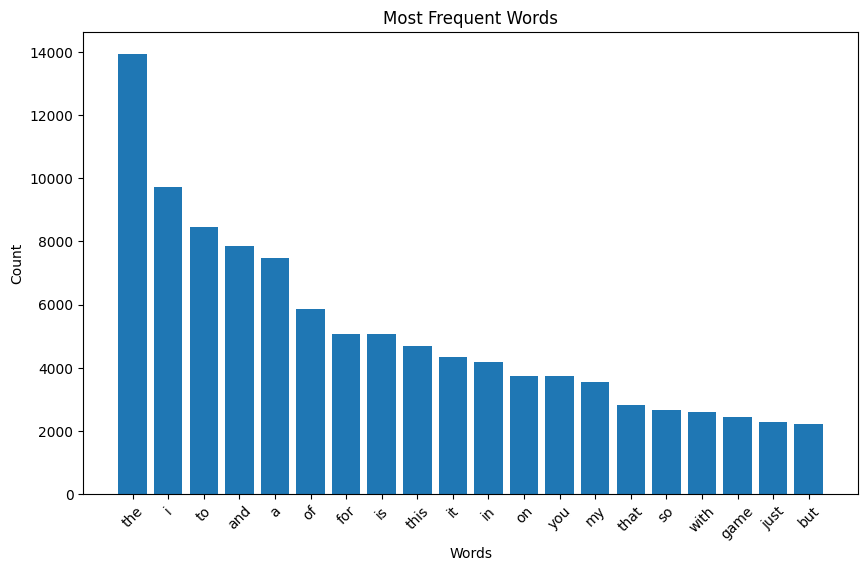

In [19]:
#Most frequent word

from collections import Counter
import re

#Clean and tokenization of text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower().split()

all_words = []
df['Text'].dropna().apply(lambda x: all_words.extend(clean_text(x)))

word_counts = Counter(all_words).most_common(20)
words, counts = zip(*word_counts)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


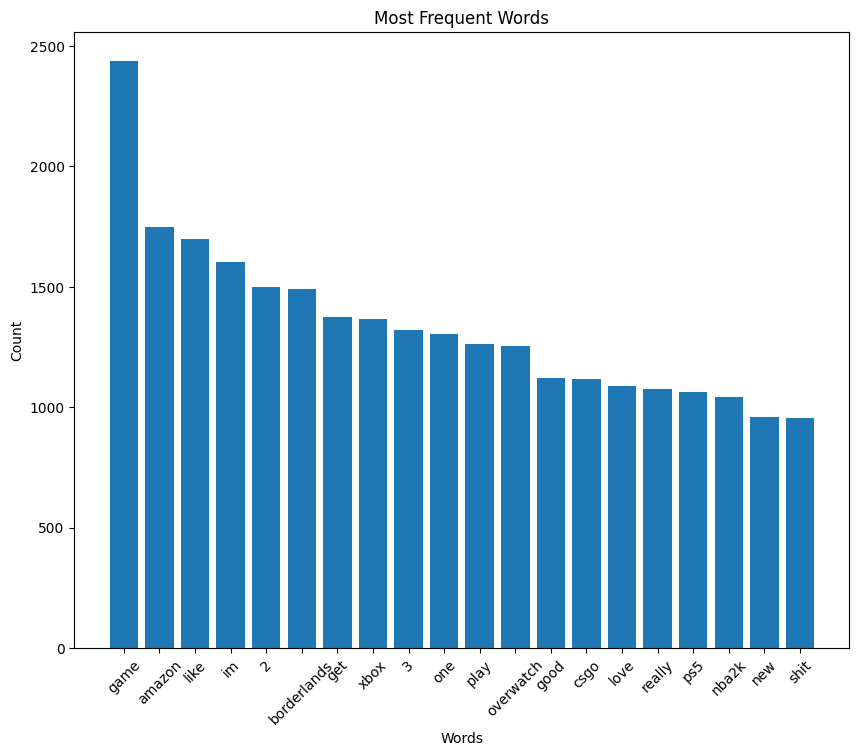

In [20]:
#Most common word after removal of stop words.

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#Custom words to remove
custom_words = ['the', 'and', 'to', 'of', 'is', 'in', 'that', 'it', 'for', 'with', 'on']

def tokenize(text):
  text = re.sub(r'[^\w\s]', '', text)
  words = text.lower().split()
  words = [word for word in words if word not in stop_words and word not in custom_words]
  return words

all_words = []
df['Text'].dropna().apply(lambda x: all_words.extend(tokenize(x)))

word_counts = Counter(all_words).most_common(20)
words, counts = zip(*word_counts)

plt.figure(figsize=(10,8))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Frequent Words')
plt.xticks(rotation=45)
plt.show()



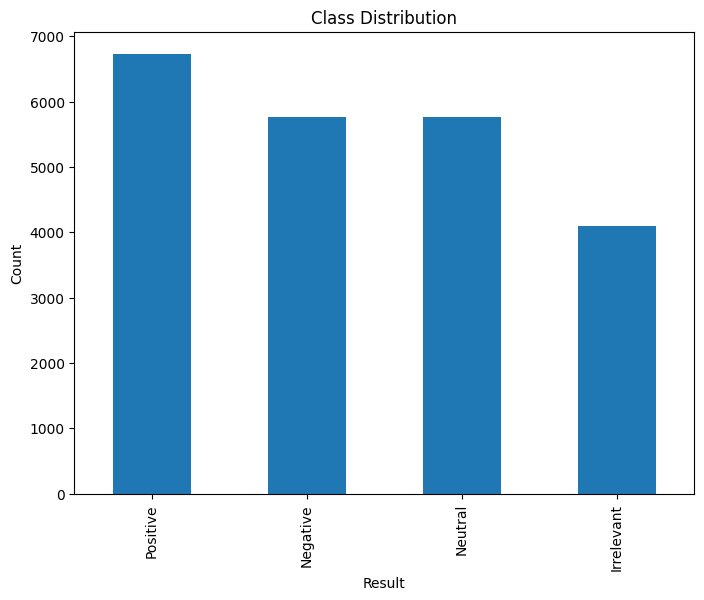

In [21]:
#Class wise distribution bar chart

plt.figure(figsize=(8, 6))
df['Result'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

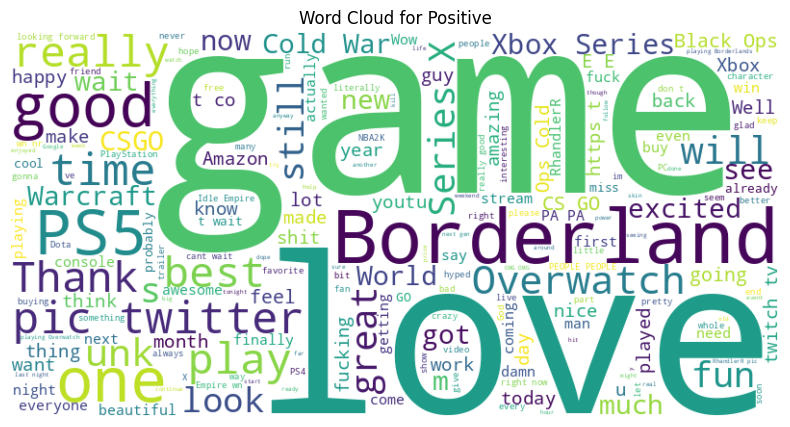

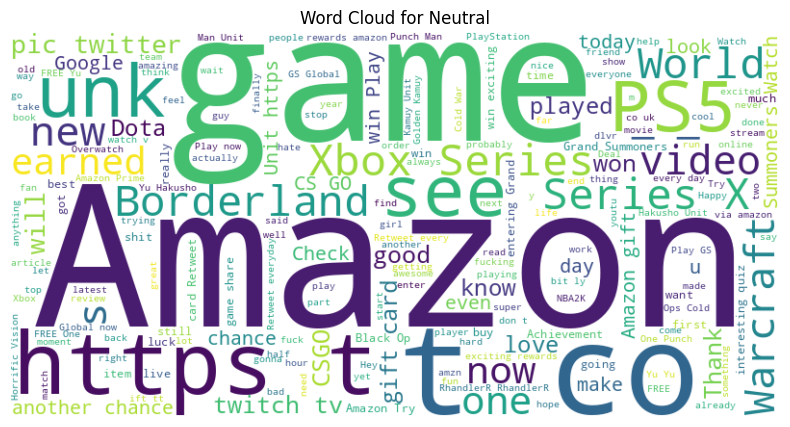

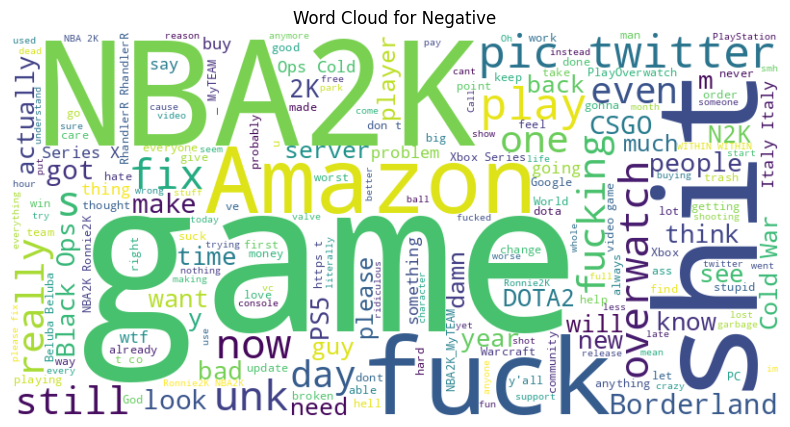

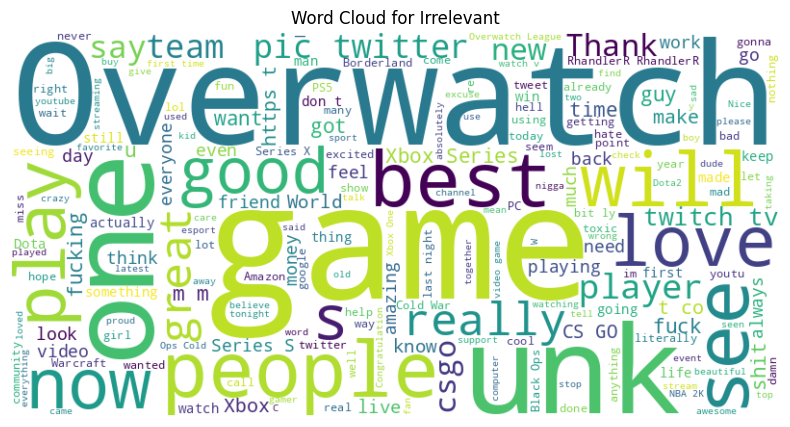

In [22]:
#Word Cloud per Sentiment

from wordcloud import WordCloud

sentiments = df['Result'].unique()

for s in sentiments:
    text = " ".join(df[df['Result'] == s]['Text'].astype(str))
    wc = WordCloud(width = 800, height = 400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud for {s}")
    plt.axis('off')
    plt.show()

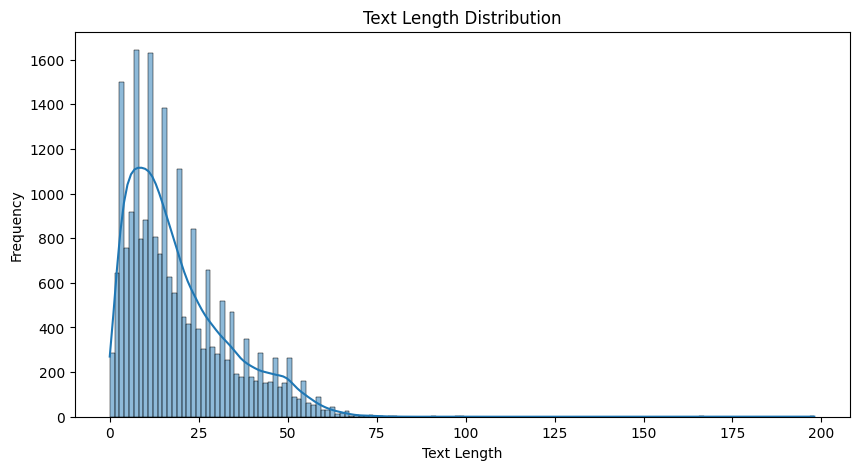

In [23]:
#Text Length distribution

df['Text_Length'] = df['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df['Text_Length'], kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Insights:


1.   Stop words counted for the most frequency in data, after removal the "game" counteed for the most frequent word in data.
2.   Positive classes have the highest count, followed by neutral and negative having similar count. Irrelevant clas had the least count.


3.   Text length distribution shows the longer length text were less compared to smaller text.
4.   Most highlighted word in wordcloud were most frequently present in dataset. "Game" was present in all three classes.











# Data Preprocessing

In [24]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (run once)
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text).strip()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]

    return " ".join(words)

df["clean_text"] = df["Text"].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Topic,Result,Text,Text_Length,clean_text
0,Borderlands,Positive,I am coming to the borders and I will kill you...,12,coming border kill
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,im getting borderland kill
2,Borderlands,Positive,im coming on borderlands and i will murder you...,10,im coming borderland murder
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,im getting borderland murder
4,Borderlands,Positive,im getting into borderlands and i can murder y...,10,im getting borderland murder


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["Text"], df["Result"], test_size=0.2, random_state=42
)


Feature Engineering

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Model Selection

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred):

    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec  = recall_score(y_true, y_pred, average='weighted')
    f1   = f1_score(y_true, y_pred, average='weighted')
    cm   = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print("METRICS")
    print("---------------------------------")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)



In [32]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

evaluate_model(y_test, y_pred)

METRICS
---------------------------------
Accuracy:  0.8587
Precision: 0.8626
Recall:    0.8587
F1 Score:  0.8578

Confusion Matrix:
[[ 648   48   66  117]
 [  21 1027   32   73]
 [  14   56  958   88]
 [  22   43   52 1207]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.92      0.74      0.82       879
    Negative       0.87      0.89      0.88      1153
     Neutral       0.86      0.86      0.86      1116
    Positive       0.81      0.91      0.86      1324

    accuracy                           0.86      4472
   macro avg       0.87      0.85      0.86      4472
weighted avg       0.86      0.86      0.86      4472



In [33]:
#Linear SVM
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred = svm.predict(X_test_tfidf)

evaluate_model(y_test, y_pred)

METRICS
---------------------------------
Accuracy:  0.9314
Precision: 0.9323
Recall:    0.9314
F1 Score:  0.9313

Confusion Matrix:
[[ 776   20   27   56]
 [  11 1088   16   38]
 [  11   17 1041   47]
 [  14   22   28 1260]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.88      0.92       879
    Negative       0.95      0.94      0.95      1153
     Neutral       0.94      0.93      0.93      1116
    Positive       0.90      0.95      0.92      1324

    accuracy                           0.93      4472
   macro avg       0.93      0.93      0.93      4472
weighted avg       0.93      0.93      0.93      4472



In [34]:
#Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)

evaluate_model(y_test, y_pred)

METRICS
---------------------------------
Accuracy:  0.7833
Precision: 0.8187
Recall:    0.7833
F1 Score:  0.7757

Confusion Matrix:
[[ 419  120   57  283]
 [   2 1012   18  121]
 [   2  106  833  175]
 [   3   48   34 1239]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.98      0.48      0.64       879
    Negative       0.79      0.88      0.83      1153
     Neutral       0.88      0.75      0.81      1116
    Positive       0.68      0.94      0.79      1324

    accuracy                           0.78      4472
   macro avg       0.83      0.76      0.77      4472
weighted avg       0.82      0.78      0.78      4472



Observation: Linear SVM works the best amongst all three models.

In [35]:
#Hypertuning the models to evaluate accuracy further more.

from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]  # best for text + L2
}

# Grid search
grid_lr = GridSearchCV(
    lr,
    param_grid_lr,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train_tfidf, y_train)

print("Best LR Params:", grid_lr.best_params_)
print("Best LR Score:", grid_lr.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best LR Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR Score: 0.917274943943573


In [36]:
y_pred = grid_lr.predict(X_test_tfidf)

evaluate_model(y_test, y_pred)

METRICS
---------------------------------
Accuracy:  0.9251
Precision: 0.9261
Recall:    0.9251
F1 Score:  0.9251

Confusion Matrix:
[[ 771   21   29   58]
 [  12 1079   19   43]
 [  12   21 1034   49]
 [  15   25   31 1253]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.95      0.88      0.91       879
    Negative       0.94      0.94      0.94      1153
     Neutral       0.93      0.93      0.93      1116
    Positive       0.89      0.95      0.92      1324

    accuracy                           0.93      4472
   macro avg       0.93      0.92      0.92      4472
weighted avg       0.93      0.93      0.93      4472



In [37]:
### Accurracy improved from 85 to 92 after hypertuning Logistic Regression Model.

In [38]:
#Hypertuning Linear SVM

param_grid_svm = {
    "C": [0.01, 0.1, 1, 10],
    "loss": ["hinge", "squared_hinge"]
}

# Grid search
grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train_tfidf, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM Score:", grid_svm.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best SVM Params: {'C': 10, 'loss': 'squared_hinge'}
Best SVM Score: 0.9244431143267212


In [39]:
y_pred = grid_svm.predict(X_test_tfidf)

evaluate_model(y_test, y_pred)

METRICS
---------------------------------
Accuracy:  0.9264
Precision: 0.9271
Recall:    0.9264
F1 Score:  0.9265

Confusion Matrix:
[[ 784   18   23   54]
 [  15 1073   18   47]
 [  17   15 1040   44]
 [  19   29   30 1246]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.94      0.89      0.91       879
    Negative       0.95      0.93      0.94      1153
     Neutral       0.94      0.93      0.93      1116
    Positive       0.90      0.94      0.92      1324

    accuracy                           0.93      4472
   macro avg       0.93      0.92      0.93      4472
weighted avg       0.93      0.93      0.93      4472



In [40]:
#Observation: hypertuning using gridseachcv has no effect on the accuracy of Linear SVM Model

Final Selection: Linear SVM (without hypertuning) shows the best results

In [41]:
y_pred = svm.predict(X_test_tfidf)

evaluate_model(y_test, y_pred)

METRICS
---------------------------------
Accuracy:  0.9314
Precision: 0.9323
Recall:    0.9314
F1 Score:  0.9313

Confusion Matrix:
[[ 776   20   27   56]
 [  11 1088   16   38]
 [  11   17 1041   47]
 [  14   22   28 1260]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.88      0.92       879
    Negative       0.95      0.94      0.95      1153
     Neutral       0.94      0.93      0.93      1116
    Positive       0.90      0.95      0.92      1324

    accuracy                           0.93      4472
   macro avg       0.93      0.93      0.93      4472
weighted avg       0.93      0.93      0.93      4472



In [42]:
#Saving the model

import pickle

pickle.dump(tfidf, open("tfidf.pkl","wb"))
pickle.dump(svm, open("svm.pkl","wb"))


In [43]:
#Requirements
import sys
import sklearn
import pandas as pd
import numpy as np
import nltk

print("Python version:", sys.version)
print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("nltk version:", nltk.__version__)

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
scikit-learn version: 1.6.1
pandas version: 2.2.2
numpy version: 2.0.2
nltk version: 3.9.1
